In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("Hitters.csv")
data.dtypes

In [ ]:
# drop non-numeric variables from the data set for this exercise.
data.drop(['Unnamed: 0','League','Division','NewLeague'],axis=1, inplace=True)

data.head(5)

data.dtypes

In [26]:
# missing values 
# drop missing values

data.isnull().sum()

data.dropna(inplace=True)

In [27]:
y = data.Salary

X = data.drop(['Salary'], axis = 1)


In [ ]:
# creating an array of potential alphas
alphas = np.arange(0.1,6,0.025)
alphas


In [40]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**LASSO REGRESSION**

Lasso regression does variable selection. 

Text(0, 0.5, 'coefficients')

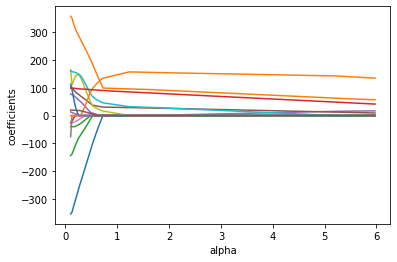

In [41]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for i in alphas:
    lasso = Lasso(alpha = i, normalize = True)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
fig = plt.figure()
ax = plt.axes()
ax.plot(alphas,coefs)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficients')

In [42]:
# finding the optimal alpha using 5-fold cross validation
lassocv = LassoCV(alphas = alphas,cv = 5,max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print(lassocv.alpha_)

0.22499999999999998


In [43]:
# MSE for test set
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


139679.8684688007

In [44]:
pd.Series(lasso.coef_, index=X.columns)

AtBat     -1.952272
Hits       6.662623
HmRun     -4.274239
Runs      -0.000000
RBI        2.397850
Walks      3.541947
Years     -3.768896
CAtBat    -0.000000
CHits      0.217824
CHmRun     1.799708
CRuns      0.035492
CRBI       0.000000
CWalks    -0.337305
PutOuts    0.341512
Assists    0.023419
Errors     2.882732
dtype: float64

Using the optimal alpha value, "Runs" "CRBI" and "CAtBat" have coefficient values of zero. Therefore, there are only 13 predictors left in the model.

**RIDGE REGRESSION**

Ridge regression doesn't do variable selection.

(236, 16)

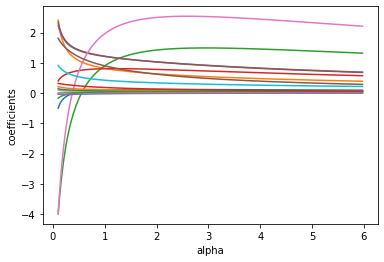

In [45]:
coefs2 = []

for i in alphas:
    ridge = Ridge(alpha = i, normalize = True)
    ridge.fit(X_train, y_train)
    coefs2.append(ridge.coef_)
    
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(alphas,coefs2)
plt.xlabel('alpha')
plt.ylabel('coefficients')
    
np.shape(coefs2)
#coefs

In [46]:
# Finding optimal alpha value using cross-validation technique
ridgecv = RidgeCV(alphas = alphas,cv = 5, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_


0.1

In [47]:
# using optimal alpha value found above to find test MSE

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

137071.39768575333

In [48]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat     -0.463652
Hits       2.106433
HmRun     -2.284238
Runs       1.359761
RBI        1.155556
Walks      2.819749
Years     -6.565497
CAtBat     0.003567
CHits      0.107357
CHmRun     0.614058
CRuns      0.240508
CRBI       0.216115
CWalks    -0.143558
PutOuts    0.259934
Assists    0.133756
Errors    -3.160634
dtype: float64

**2: Bias-variance trade-off**

Bias measures the difference between the average prediction of a model and the true value. High bias means the model doesn't pay enough attention to the training data. It oversimplies the model and therefore, is under fit. 

Variance measures the variability of the model accuracy on a given set of data. High variance means the model pays too much attention to the training data (over fit). Therefore, it does poorly when it is applied to the test set. 

When building model, one has to pay close attention to the bias-variance trade-off. It is a tradeoff of how each model is underfitting or overfitting. Higher bias/lower variance means the model is underfitting. Lower bias/higher variance means the model is overfitting.

Regularization is a regression method used to solve high variance issue. For overfit model, it minimizes the effect of predictors with large outliers by penalizing their regression coefficients. This way, the resulting model will be smoother and will work well with test sets. 

In the examples above, the choice of alpha is important. It helps manage the bias/variance tradeoff. One can choose a random alpha that works really well with the training data, but does not work well with the test data. Cross-validation can be used to find the optimal value of regulization penalty as shown above for both Lasso and Ridge regressions. 

